Accuracy: 0.960351203769231
Confusion Matrix:
 [[342612  20169]
 [  8628 354893]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96    362781
           1       0.95      0.98      0.96    363521

    accuracy                           0.96    726302
   macro avg       0.96      0.96      0.96    726302
weighted avg       0.96      0.96      0.96    726302

AccX: 0.07943356037669425
AccY: 0.2892485744812894
AccZ: 0.16342002193325633
GyrX: 0.2717129919844764
GyrY: 0.09819030287334549
GyrZ: 0.09799454835093808


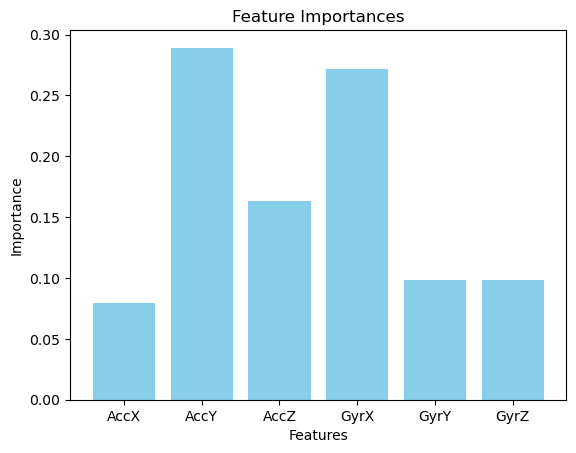

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming df is already loaded with your sensor data
df=pd.read_csv('bal_fall_detection.csv')
# Handle missing values (if any)
df = df.dropna()

# Select features and target
features = ['AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ']
X = df[features]
y = df['Fall'].astype(int)

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importances
feature_importances = model.feature_importances_
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")

# Display feature importances in a bar plot
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Plotting the learning curves
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(14, 6))

# Plot learning curve for accuracy
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')
plt.title('Learning Curve for RandomForestClassifier (Accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Plot learning curve for loss (negative log loss)
plt.subplot(1, 2, 2)
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring='neg_log_loss', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training loss', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation loss', color='green')
plt.title('Learning Curve for RandomForestClassifier (Neg Log Loss)')
plt.xlabel('Training Set Size')
plt.ylabel('Neg Log Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
